<a href="https://colab.research.google.com/github/frederick-lenin/SMS-SPAM-DETECTION/blob/main/SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('sms.csv', encoding = "latin-1")

In [6]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

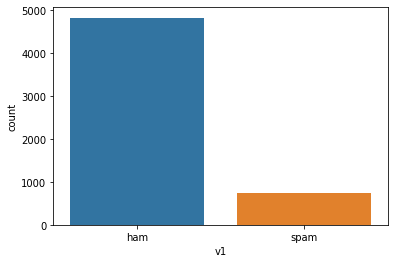

In [8]:
sns.countplot(data=data,x='v1')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...   
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568             Will Ì_ b going to esplanade fr home?   
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                        Rofl. Its true to its name   
Name: v2, Length: 5572, dtype: object

In [11]:
data['v2'].shape

(5572,)

In [12]:

data.shape

(5572, 2)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
f = CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
print(X.shape)

(5572, 8491)


In [14]:
X

<5572x8491 sparse matrix of type '<class 'numpy.int64'>'
	with 43776 stored elements in Compressed Sparse Row format>

In [15]:
y = data["v1"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4179, 8491) (1393, 8491) (4179,) (1393,)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()#Choose the model
lr.fit(X_train,y_train) #train the model
lra = round(lr.score(X_test, y_test)*100,2)
print('accuracy score = ',lra,'%')

accuracy score =  97.2 %


In [19]:
text = ['Dear Customer, You have a missed call from +919361262816 The last missed call was at 09:03 AM on 05-Jun-2021 Thankyou, Team Jio.',
        'Purushottam joined Junglee Rummy with Rs.50 and won a Royal Enfield bike. You can win cash prize too. Hurry up! Play now : https://jrum.my/PgCC4',
        'Plot @ 12lacs or Villa @ 35lacs (all inclusive) within residential township with operational facilities.Call Arun Excello: 8448324062 (RERA:TN/01/0322/2021)',
        'Due to COVID-19,if you want to make money at home.I will teach you how to earn 3000-7000 ruppes a day, please click to contact me https://wa.me/919593438772'
        ]

text = f.transform(text)

In [20]:
lr.predict(text)

array(['ham', 'spam', 'ham', 'ham'], dtype=object)

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
mna = round(lr.score(X_test, y_test)*100,2)
print('accuracy score = ',mna,'%')

accuracy score =  97.2 %


In [22]:
clf.predict(text)

array(['spam', 'spam', 'spam', 'ham'], dtype='<U4')